In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
import pandas as pd
import astropy.constants as cnst
import astropy.units as units
from lmfit.models import PseudoVoigtModel # !pip install lmfit first

%config InlineBackend.figure_format='retina'

In [7]:
# Luminosity data of galaxy NGC 4654, located in the Virgo cluster
NGC4654_lumdf = pd.read_fwf('NGC4654.sfb')
NGC4654_lumdf

radius      mu kill error
0     1.86  14.577    1 0.000
1     2.05  14.901    1 0.000
2     2.25  15.008    1 0.014
3     2.48  15.029    1 0.010
4     2.73  14.432    1 0.003
5     3.00  15.179    1 0.006
6     3.30  15.328    1 0.006
7     3.63  15.399    1 0.005
8     3.99  15.275    1 0.003
9     4.39  15.542    1 0.004
10    4.83  15.489    1 0.006
11    5.31  15.671    1 0.007
12    5.85  15.534    1 0.005
13    6.43  15.612    1 0.006
14    7.07  15.936    1 0.008
15    7.78  15.861    1 0.007
16    8.56  15.450    1 0.007
17    9.42  15.815    1 0.012
18   10.36  15.913    1 0.010
19   11.39  16.168    1 0.010
20   12.53  16.278    1 0.013
21   13.78  16.411    1 0.022
22   15.16  16.561    1 0.009
23   16.68  16.653    1 0.005
24   18.35  16.718    1 0.006
25   20.18  16.803    1 0.008
26   22.20  16.884    1 0.008
27   24.42  16.975    1 0.006
28   26.86  17.088    1 0.006
29   29.55  17.187    1 0.007
30   32.50  17.262    1 0.008
31   35.75  17.318    1 0.013
32   39.33  17.569    1 0.014
33   43.26  17.791    1 0.016
34   47.59  17.953    1 0.011
35   52.35  18.032    1 0.011
36   57.58  18.145    1 0.011
37   63.34  18.353    1 0.012
38   69.68  18.541    1 0.016
39   76.64  18.705    1 0.017
40   84.31  19.083    1 0.018
41   92.74  19.434    1 0.022
42  102.01  19.676    1 0.028
43  112.21  20.075    1 0.039
44  123.43  20.473    1 0.050
45  135.78  20.903    1 0.075
46  149.36  21.336    1 0.106
47  164.29  21.709    1 0.144
48  180.72  22.043    1 0.191
49  198.79  22.592    1 0.302
50  218.67  22.767    0 0.344
51  240.54  22.368    0 0.250
52  264.59  23.225    0 0.489
53  291.05  22.937    0 0.392

In [3]:
rad = pd.read_fwf('NGC4654.sfb', usecols=[0])
lum = pd.read_fwf('NGC4654.sfb', usecols=[1])

rad_array = np.array(rad)
lum_array = np.array(lum)

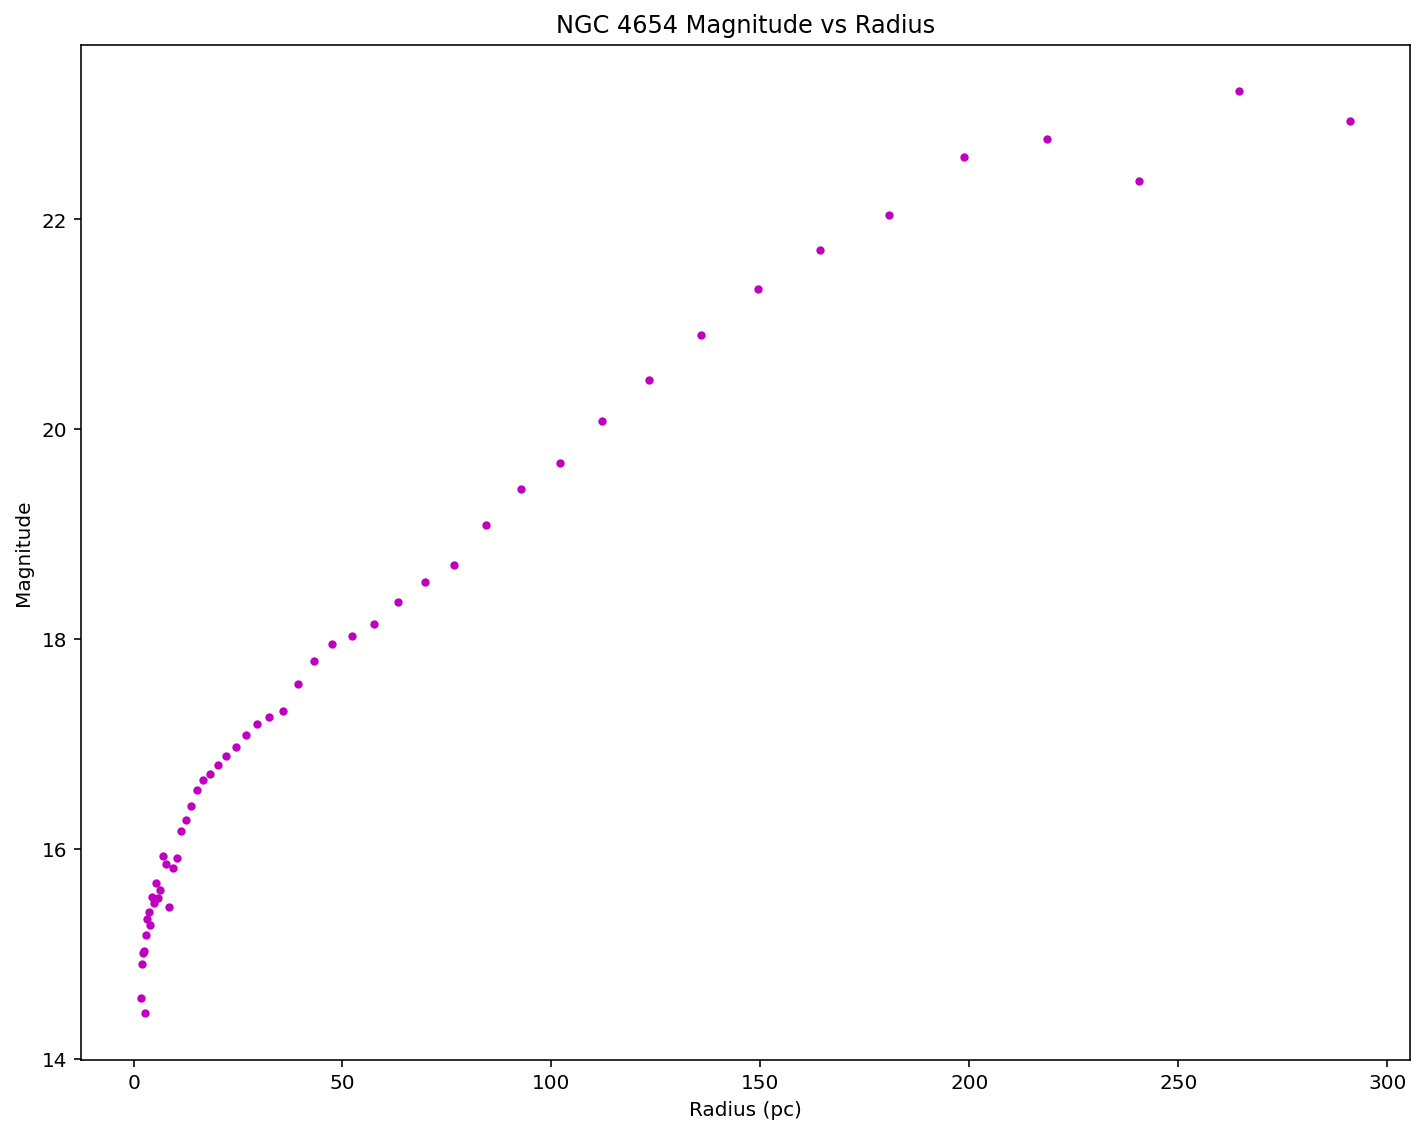

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(rad, lum, s = 10, c = 'm')
plt.xlabel('Radius (pc)')
plt.ylabel('Magnitude')
plt.title('NGC 4654 Magnitude vs Radius')
plt.tight_layout()
plt.show()

In [11]:
"""Solar magnitude to Luminosity"""

def luminosity (M):
    """
    Function that converts solar magnitude to luminosity.
    """
    Mag_sun = 4.83
    Lsun = cnst.L_sun.value
    L = (10**((M - Mag_sun)/(-2.5)) * Lsun)
    return L

In [12]:
L_list = []
for i in lum_array:
    L_list.append(luminosity(i))

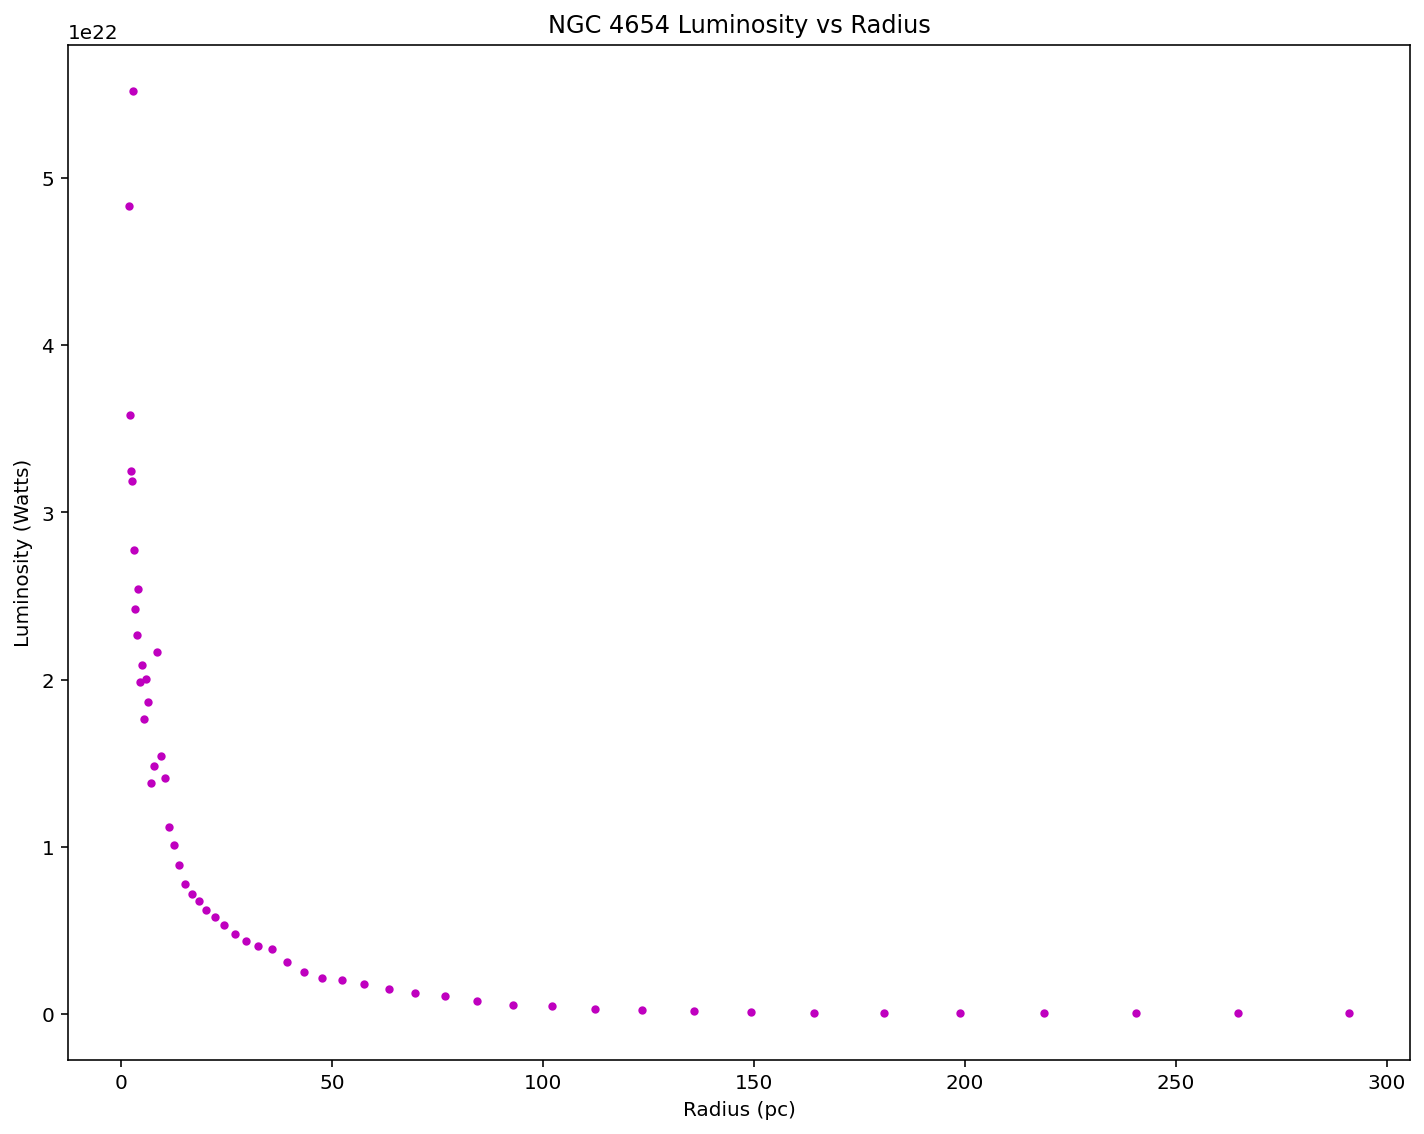

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(rad_array, L_list, s = 10, c = 'm')
plt.xlabel('Radius (pc)')
plt.ylabel('Luminosity (Watts)')
plt.title('NGC 4654 Luminosity vs Radius')
plt.tight_layout()
plt.show()

[[Model]]
    Model(pvoigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 54
    # variables        = 4
    chi-square         = 7.2786e+44
    reduced chi-square = 1.4557e+43
    Akaike info crit   = 5370.72340
    Bayesian info crit = 5378.67933
    R-squared          = 0.91725224
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  2.7267e+25 (init = 1.180174e+23)
    center:    -12.8552716 (init = 2.395)
    sigma:      5.54639330 (init = 0.57)
    fraction:   0.14363406 (init = 0.5)
    fwhm:       11.0927866 == '2.0000000*sigma'
    height:     2.2023e+24 == '(((1-fraction)*amplitude)/max(1e-15, (sigma*sqrt(pi/log(2))))+(fraction*amplitude)/max(1e-15, (pi*sigma)))'


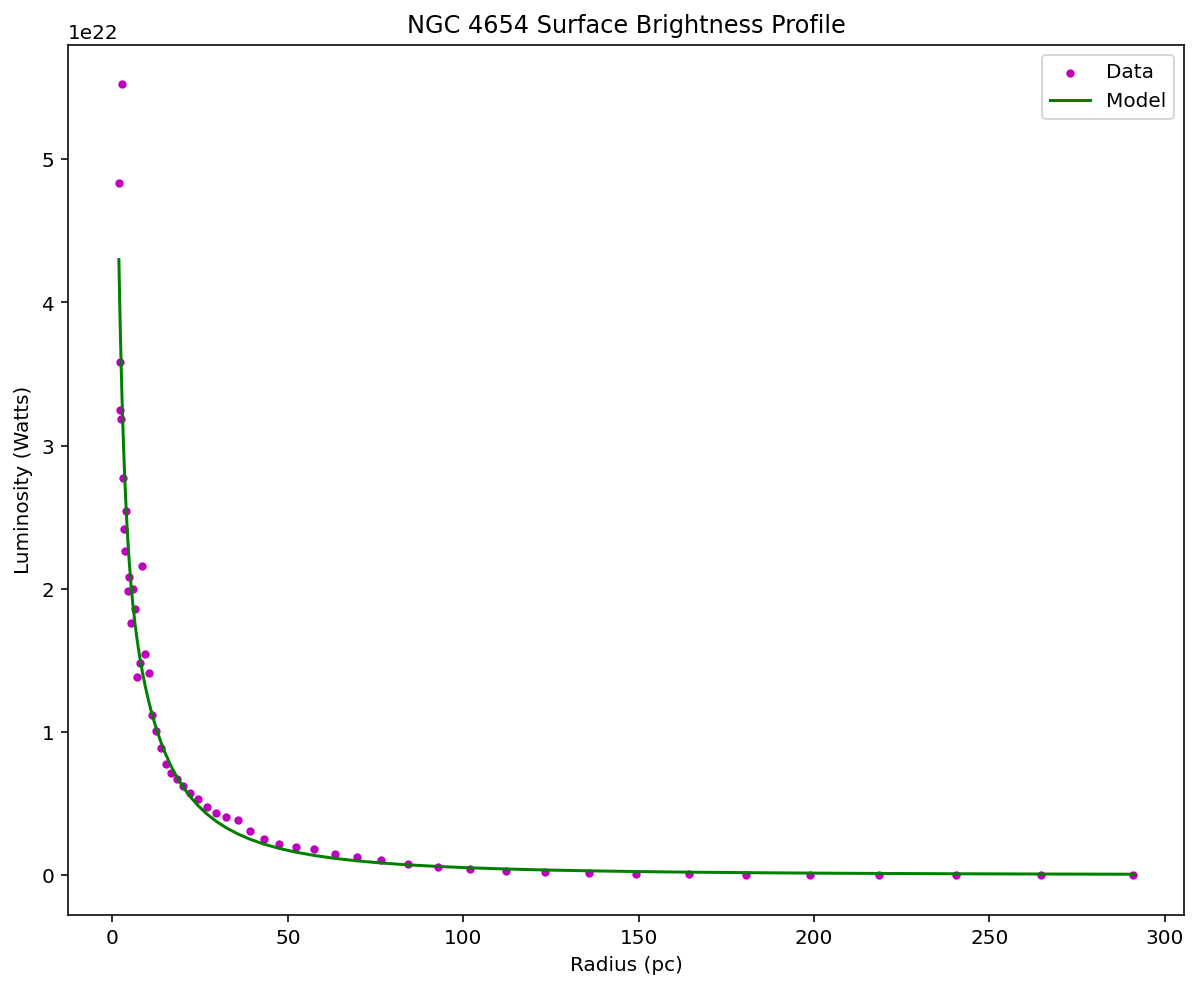

In [17]:
"""Curve Fitting"""

#x and y data
x0 = rad_array
x = x0.flatten()
y0 = np.array(L_list)
y = y0.flatten()


mod = PseudoVoigtModel()

pars = mod.guess(y, x = x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl = 0.25))


plt.figure(figsize=(10,8))
plt.tight_layout()
plt.scatter(x, y, s = 10, c = 'm', label = "Data")
plt.xlabel('Radius (pc)')
plt.ylabel('Luminosity (Watts)')
plt.title('NGC 4654 Surface Brightness Profile')
plt.plot(x, out.best_fit, label = "Model", c = "g")
plt.legend()
plt.show()